In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
data1 = pd.read_csv("../input/datathon2022/sample_solution.csv")
data2 = pd.read_csv("../input/datathon2022/testFeatures.csv")
data3 = pd.read_csv("../input/datathon2022/train.csv")
data4 = pd.read_csv("../input/enflasyonverisi/enflasyonlar2.csv")
# ../input/enflasyonverisi/enflasyonlar2.csv

In [2]:
data4.columns = ["tarih","enflasyon"]
df_enflasyon = pd.DataFrame(data = data4)
df_enflasyon = df_enflasyon.apply(lambda x: x.str.replace(';', ''))
print(type(df_enflasyon["enflasyon"].values[0]))
df_enflasyon["enflasyon"] = df_enflasyon["enflasyon"].astype(float)
print(type(df_enflasyon["enflasyon"].values[0]))

<class 'str'>
<class 'numpy.float64'>


In [3]:
df_enflasyon["tarih"] = pd.to_datetime(df_enflasyon["tarih"])
df_enflasyon["tarih"] = df_enflasyon["tarih"].dt.strftime('%m-%Y')
df_enflasyon.tarih.values[0]

'01-2016'

In [4]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227520 entries, 0 to 227519
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tarih              227520 non-null  object 
 1   ürün               227520 non-null  object 
 2   ürün besin değeri  227520 non-null  int64  
 3   ürün kategorisi    227520 non-null  object 
 4   ürün fiyatı        227520 non-null  float64
 5   ürün üretim yeri   227520 non-null  object 
 6   market             227520 non-null  object 
 7   şehir              227520 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 13.9+ MB


In [5]:
data3.describe()

,ürün besin değeri,ürün fiyatı
count,227520.000000,227520.000000
mean,143.113924,16.348622
std,133.218871,13.260935
min,8.000000,0.730000
25%,41.000000,7.330000
50%,83.000000,12.600000
75%,250.000000,20.900000
max,402.000000,141.330000


In [6]:
data3.describe(include=['O'])

,tarih,ürün,ürün kategorisi,ürün üretim yeri,market,şehir
count,227520,227520,227520,227520,227520,227520
unique,60,79,6,2,3,8
top,2016-01-01,kıyma,sebze ve bakliyat,Yurt içi,M,A
freq,3792,2880,83520,113760,75840,28440


In [7]:
df3 = pd.DataFrame(data = data3)
df2 = pd.DataFrame(data = data2)
train_kategori = df3["ürün kategorisi"].unique()
train_besin_degeri = df3["ürün besin değeri"]

for kategori in train_kategori:
    print(kategori)

tarihler = df3["tarih"].unique()
all_ürünler = df3["ürün"].unique()
market = df3["market"].unique()
sehir = df3["şehir"].unique()
market
sehir

et
sebze ve bakliyat
tahıl ve ürünleri
süt ürünleri ve kahvaltılık
meyve
kuruyemiş


array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype=object)

<AxesSubplot:>

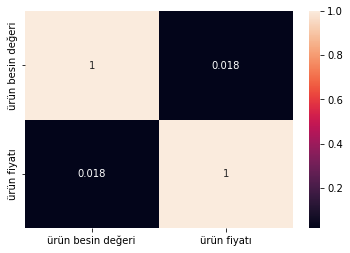

In [8]:
sns.heatmap(df3.corr(), annot = True)

In [9]:
degerler = df3.duplicated()

for deger in degerler:
    if deger == True:
        print("A")

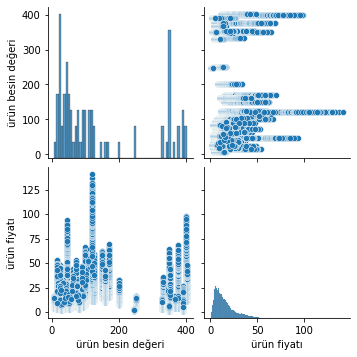

In [10]:
sns.pairplot(df3)

et --> 8640
sebze ve bakliyat --> 83520
tahıl ve ürünleri --> 34560
süt ürünleri ve kahvaltılık --> 34560
meyve --> 51840
kuruyemiş --> 14400


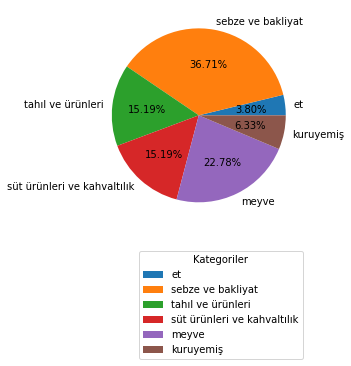

In [11]:
#Kategorilerin Oranı
lengths = []
kategoriler = []
for kategori in train_kategori:
    length = len(df3.loc[df3["ürün kategorisi"] == kategori])
    print(f"{kategori} --> {length}")
    lengths.append(len(df3.loc[df3["ürün kategorisi"] == kategori]))
    kategoriler.append(kategori)
lengths

plt.pie(lengths,labels = kategoriler, autopct='%1.2f%%')
# plt.legend(title = "Kategoriler", loc = "upper right")
plt.legend(title = "Kategoriler",bbox_to_anchor = (1, -0.1))
plt.show()

,yıl,ürün kategorisi,ürün fiyatı
0,2016,et,20.122269
1,2016,kuruyemiş,17.109031
2,2016,meyve,5.662894
3,2016,sebze ve bakliyat,8.454689
4,2016,süt ürünleri ve kahvaltılık,14.503876
5,2016,tahıl ve ürünleri,5.414829
6,2017,et,25.238576
7,2017,kuruyemiş,21.403479
8,2017,meyve,7.090582
9,2017,sebze ve bakliyat,10.601573


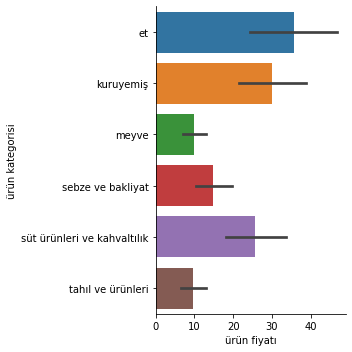

In [12]:
#Yıllık
df4 = df3.copy()
df4["tarih"] = pd.to_datetime(df4["tarih"])
df4["yıl"] = df4.tarih.dt.year
df4["ay"] = df4.tarih.dt.month
mean_df = pd.DataFrame(df4.groupby(["yıl", "ürün kategorisi"])["ürün fiyatı"].mean())
max_df = pd.DataFrame(df4.groupby(["yıl", "ürün kategorisi"])["ürün fiyatı"].max())
min_df = pd.DataFrame(df4.groupby(["yıl", "ürün kategorisi"])["ürün fiyatı"].min())
mean_df = mean_df.reset_index()
max_df = max_df.reset_index()
min_df = min_df.reset_index()
mean_df
mean2_df = mean_df.loc[mean_df["yıl"] == 2016]
sns.catplot(data = mean_df,x = "ürün fiyatı",y = "ürün kategorisi", kind = "bar")
# sns.lineplot(data = mean_df,x = "ürün fiyatı",y = "ürün kategorisi")
mean_df

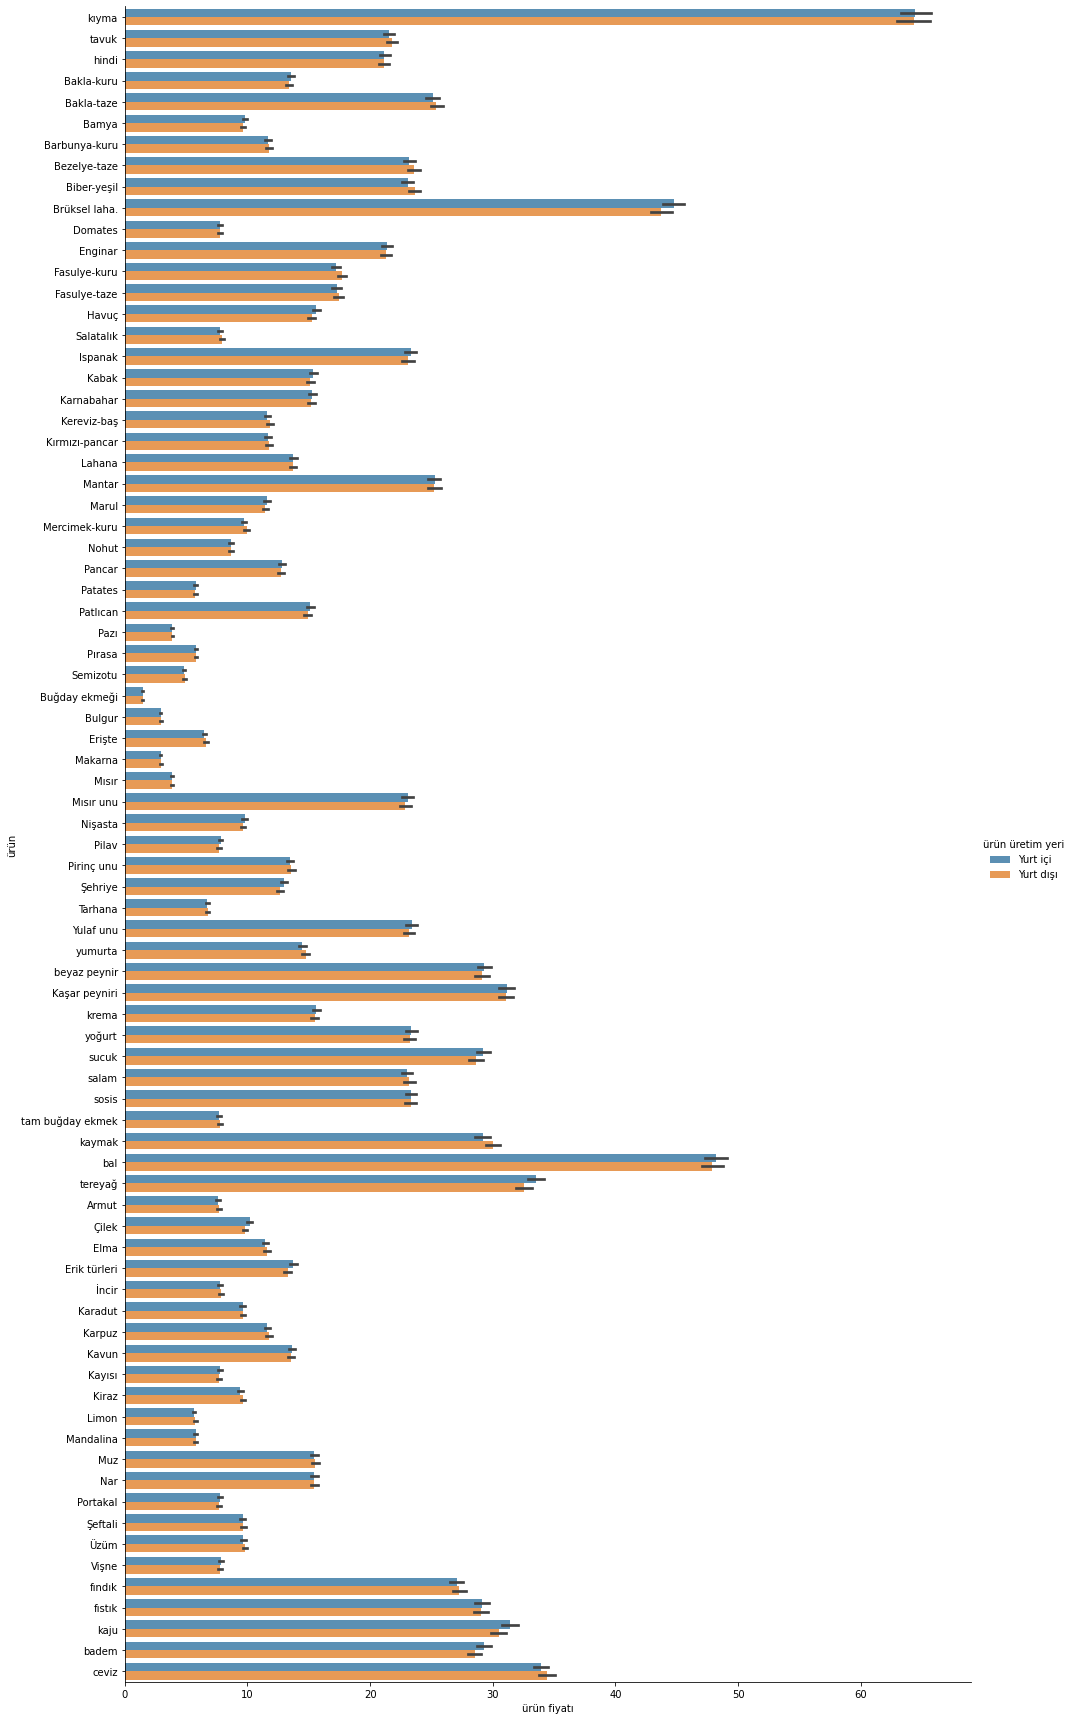

In [13]:
sns.catplot(x="ürün fiyatı", y="ürün", hue="ürün üretim yeri", kind="bar",\
            data=df4, height=24, alpha=.8, aspect=3/5.2)

(170.0, 182.0)

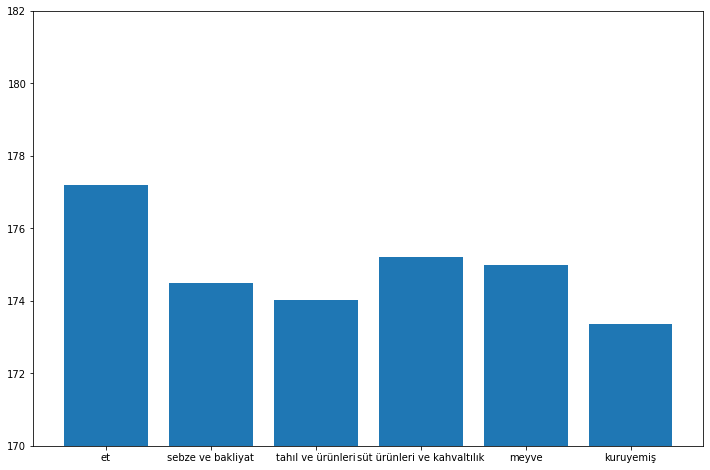

In [14]:
#YILLIK ARTIŞ ORANI
#2016 ile 2020 arasındaki artış oranı kategori için
# yıllar = [2016,2017,2018,2019,2020]
yıllar = [2016,2020]
artış_oranı_yıllık = []
kategoriler = []
for kategori in train_kategori:
    temp_df4 = mean_df.loc[max_df["ürün kategorisi"] == kategori]
    fiyatlar = []
    kategoriler.append(kategori)
    for yıl in yıllar:
        temp_df5 = temp_df4.loc[temp_df4["yıl"] ==  yıl]
        fiyat = temp_df5["ürün fiyatı"].values[0]
        fiyatlar.append(fiyat)
#     print(fiyatlar)
    oran = ((fiyatlar[1] - fiyatlar[0]) / fiyatlar[0]) * 100
#     print(f"{kategori} = Artış oranı --> %{oran}")
    artış_oranı_yıllık.append(oran)
plt.figure(figsize = (12, 8))
plt.bar(kategoriler, artış_oranı_yıllık)
plt.ylim([170,182])

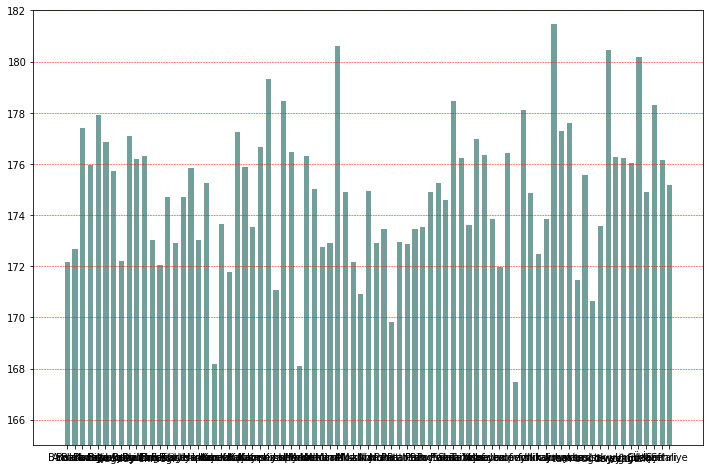

In [15]:
mean_df_ürün = pd.DataFrame(df4.groupby(["yıl", "ürün"])["ürün fiyatı"].mean())
mean_df_ürün = mean_df_ürün.reset_index()
ürünler = mean_df_ürün["ürün"].unique()
yıllar = [2016,2020]
artış_oranı_aylık = []
for ürün in ürünler:
    temp_df4 = mean_df_ürün.loc[mean_df_ürün["ürün"] == ürün]
    fiyatlar_ürün = []
    for yıl in yıllar:
        temp_df5 = temp_df4.loc[temp_df4["yıl"] == yıl]
        fiyatlar_ürün.append(temp_df5["ürün fiyatı"].values[0])
    oran = ((fiyatlar_ürün[1] - fiyatlar_ürün[0]) / fiyatlar_ürün[0]) * 100
#     print(f"{ürün} = Artış oranı --> %{oran}")
    artış_oranı_aylık.append(oran)
plt.figure(figsize =(12, 8))
plt.bar(ürünler, artış_oranı_aylık, color="#749e99",edgecolor = "w")
plt.ylim([165,182])
# plt.axhline(sayı,color="blue",linestyle = "--",linewidth = 0.5)
plt.grid(color='red', linestyle="--", linewidth=0.5, axis = "y")

# plt.plot(ürünler,artış_oranı) .cor() fonksiyonu

In [16]:
df_enflasyon

,tarih,enflasyon
0,01-2016,9.58
1,02-2016,8.78
2,03-2016,7.46
3,04-2016,6.57
4,05-2016,6.58
...,...,...
67,08-2021,19.25
68,09-2021,19.58
69,10-2021,19.89
70,11-2021,21.31


In [17]:
df5 = df3.copy()
df6 = pd.DataFrame()
for tarih in df5["tarih"].unique():
  temp = pd.Timestamp(tarih)
  # print(temp.dayofweek)
  # print(temp.day_name())
  temp_df = df5.loc[df5["tarih"] == tarih]
  # temp_df["gün"] = temp.day_name()
  temp_df["gün"] = temp.dayofweek
  df6 = df6.append(temp_df)
df6

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,gün
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A,4
1,2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A,4
2,2016-01-01,hindi,160,et,11.12,Yurt içi,M,A,4
3,2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A,4
4,2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A,4
...,...,...,...,...,...,...,...,...,...
227515,2020-12-01,fındık,110,kuruyemiş,51.19,Yurt dışı,B,H,1
227516,2020-12-01,fıstık,115,kuruyemiş,55.14,Yurt dışı,B,H,1
227517,2020-12-01,kaju,100,kuruyemiş,58.60,Yurt dışı,B,H,1
227518,2020-12-01,badem,110,kuruyemiş,51.83,Yurt dışı,B,H,1


In [18]:
df_enflasyon

,tarih,enflasyon
0,01-2016,9.58
1,02-2016,8.78
2,03-2016,7.46
3,04-2016,6.57
4,05-2016,6.58
...,...,...
67,08-2021,19.25
68,09-2021,19.58
69,10-2021,19.89
70,11-2021,21.31


In [19]:
random_df2 = pd.DataFrame()
copy_df6 = df6.copy()
copy_df6["enflasyon"] = None
copy_df6["tarih"] = pd.to_datetime(copy_df6["tarih"])
copy_df6["tarih"] = copy_df6["tarih"].dt.strftime('%m-%Y')
dates = df_enflasyon.tarih.values
for date in dates:
    result = df_enflasyon.loc[df_enflasyon["tarih"] == date]
    enflasyon = result.enflasyon.values[0]
    temp_df = copy_df6.loc[copy_df6["tarih"] == date]
    temp_df["enflasyon"] = enflasyon
    random_df2 = random_df2.append(temp_df)
random_df2

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,gün,enflasyon
0,01-2016,kıyma,120,et,33.41,Yurt içi,M,A,4,9.58
1,01-2016,tavuk,103,et,11.22,Yurt içi,M,A,4,9.58
2,01-2016,hindi,160,et,11.12,Yurt içi,M,A,4,9.58
3,01-2016,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A,4,9.58
4,01-2016,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A,4,9.58
...,...,...,...,...,...,...,...,...,...,...
227515,12-2020,fındık,110,kuruyemiş,51.19,Yurt dışı,B,H,1,14.60
227516,12-2020,fıstık,115,kuruyemiş,55.14,Yurt dışı,B,H,1,14.60
227517,12-2020,kaju,100,kuruyemiş,58.60,Yurt dışı,B,H,1,14.60
227518,12-2020,badem,110,kuruyemiş,51.83,Yurt dışı,B,H,1,14.60


In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [21]:
len(random_df2["ürün besin değeri"].unique()) # aynı besin değerine sahip olan ürünler var. DİKKAT!

56

In [22]:
random_df2["ürün"] = le.fit_transform(df3["ürün"])
random_df2["ürün kategorisi"] = le.fit_transform(df3["ürün kategorisi"])
random_df2["ürün üretim yeri"] = le.fit_transform(df3["ürün üretim yeri"])
random_df2["market"] = le.fit_transform(df3["market"])
random_df2["şehir"] = le.fit_transform(df3["şehir"])
random_df2["tarih"] = le.fit_transform(df3["tarih"])


random_df2

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,gün,enflasyon
0,0,65,120,0,33.41,1,2,0,4,9.58
1,0,70,103,0,11.22,1,2,0,4,9.58
2,0,61,160,0,11.12,1,2,0,4,9.58
3,0,1,354,3,7.02,1,2,0,4,9.58
4,0,2,72,3,13.14,1,2,0,4,9.58
...,...,...,...,...,...,...,...,...,...,...
227515,59,59,110,1,51.19,0,0,7,1,14.60
227516,59,60,115,1,55.14,0,0,7,1,14.60
227517,59,62,100,1,58.60,0,0,7,1,14.60
227518,59,55,110,1,51.83,0,0,7,1,14.60


In [23]:
df2_test = df2.copy()
del df2_test["id"]
test_df = pd.DataFrame()
for tarih in df2_test["tarih"].unique():
    temp = pd.Timestamp(tarih)
  # print(temp.dayofweek)
  # print(temp.day_name())
    temp_df = df2_test.loc[df2_test["tarih"] == tarih]
    temp_df["gün"] = temp.dayofweek
    test_df = test_df.append(temp_df)
random_df3 = pd.DataFrame()
test_df2 = test_df.copy()
test_df2["enflasyon"] = None
test_df2["tarih"] = pd.to_datetime(test_df2["tarih"])
test_df2["tarih"] = test_df2["tarih"].dt.strftime('%m-%Y')
dates = df_enflasyon.tarih.values
for date in dates:
    result = df_enflasyon.loc[df_enflasyon["tarih"] == date]
    enflasyon = result.enflasyon.values[0]
    temp_df = test_df2.loc[test_df2["tarih"] == date]
    temp_df["enflasyon"] = enflasyon
    random_df3 = random_df3.append(temp_df)
random_df3
random_df3["tarih"] = random_df3["tarih"].replace("01-2021",61)
random_df3["tarih"] = random_df3["tarih"].replace("02-2021",61)
random_df3["tarih"] = random_df3["tarih"].replace("03-2021",62)
random_df3["tarih"] = random_df3["tarih"].replace("04-2021",63)
random_df3["tarih"] = random_df3["tarih"].replace("05-2021",64)
random_df3["tarih"] = random_df3["tarih"].replace("06-2021",65)
random_df3["tarih"] = random_df3["tarih"].replace("07-2021",66)
random_df3["tarih"] = random_df3["tarih"].replace("08-2021",67)
random_df3["tarih"] = random_df3["tarih"].replace("09-2021",68)
random_df3["tarih"] = random_df3["tarih"].replace("10-2021",69)
random_df3["tarih"] = random_df3["tarih"].replace("11-2021",70)
random_df3["tarih"] = random_df3["tarih"].replace("12-2021",71)

random_df3



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir,gün,enflasyon
0,61,kıyma,120,et,Yurt içi,M,A,4,14.97
1,61,tavuk,103,et,Yurt içi,M,A,4,14.97
2,61,hindi,160,et,Yurt içi,M,A,4,14.97
3,61,Bakla-kuru,354,sebze ve bakliyat,Yurt içi,M,A,4,14.97
4,61,Bakla-taze,72,sebze ve bakliyat,Yurt içi,M,A,4,14.97
...,...,...,...,...,...,...,...,...,...
45499,71,fındık,110,kuruyemiş,Yurt dışı,B,H,2,36.08
45500,71,fıstık,115,kuruyemiş,Yurt dışı,B,H,2,36.08
45501,71,kaju,100,kuruyemiş,Yurt dışı,B,H,2,36.08
45502,71,badem,110,kuruyemiş,Yurt dışı,B,H,2,36.08


In [24]:
test2_df = random_df3.copy()
test2_df["ürün"] = le.fit_transform(test_df["ürün"])
test2_df["ürün kategorisi"] = le.fit_transform(test_df["ürün kategorisi"])
test2_df["ürün üretim yeri"] = le.fit_transform(test_df["ürün üretim yeri"])
test2_df["market"] = le.fit_transform(test_df["market"])
test2_df["şehir"] = le.fit_transform(test_df["şehir"])
# test2_df["tarih"] = le.fit_transform(test_df["tarih"])
test2_df

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir,gün,enflasyon
0,61,65,120,0,1,2,0,4,14.97
1,61,70,103,0,1,2,0,4,14.97
2,61,61,160,0,1,2,0,4,14.97
3,61,1,354,3,1,2,0,4,14.97
4,61,2,72,3,1,2,0,4,14.97
...,...,...,...,...,...,...,...,...,...
45499,71,59,110,1,0,0,7,2,36.08
45500,71,60,115,1,0,0,7,2,36.08
45501,71,62,100,1,0,0,7,2,36.08
45502,71,55,110,1,0,0,7,2,36.08


In [25]:
x = random_df2[["tarih","ürün","ürün besin değeri","ürün kategorisi","ürün üretim yeri","şehir","gün","market","enflasyon"]]
y = random_df2["ürün fiyatı"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) #random_state değiştirilebilir.
x_train

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,şehir,gün,market,enflasyon
8123,2,27,79,2,1,1,1,2,7.46
155922,41,71,375,4,0,0,5,0,15.72
13696,3,45,27,3,0,4,4,0,6.57
134059,35,60,115,1,1,2,5,0,20.30
165239,43,66,125,4,0,4,3,1,15.01
...,...,...,...,...,...,...,...,...,...
47937,12,23,28,2,1,5,6,2,9.22
59801,15,55,110,1,1,6,5,2,11.87
45722,12,76,80,2,1,0,6,1,9.22
216964,57,49,52,3,1,1,3,0,11.89


In [26]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection

In [27]:
#GridSearchCV

In [28]:
# xgb = XGBRegressor()

In [29]:
# xgb = XGBRegressor(learning_rate = 0.2,max_depth = 2,n_estimators = 2500,n_jobs = 3, objective = "reg:squarederror")
# xgb = XGBRegressor()
xgb = XGBRegressor(learning_rate = 0.05,max_depth = 3,n_estimators = 2000,n_jobs = 3, objective = "reg:squarederror",eval_metric = "rmse")

In [30]:
model_xgb = xgb.fit(x_train,y_train) #"?xgb" params için çeşitleri buradan görebilirim.

In [31]:
x_test.shape
x_test.head()

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,şehir,gün,market,enflasyon
9486,2,4,346,3,1,4,1,2,7.46
74021,19,55,110,1,1,4,1,2,10.68
161814,42,33,16,3,1,5,0,1,16.65
114344,30,51,32,3,0,1,6,2,15.85
80417,21,59,110,1,0,1,6,1,11.90


In [32]:
results = model_xgb.predict(test2_df) #df2'yi burada ver.
results

array([110.383224,  39.352276,  40.302307, ...,  53.3993  ,  51.207764,
        60.384907], dtype=float32)

In [33]:
len(results)

45504

In [34]:
result_df = pd.DataFrame(columns = ["id","ürün fiyatı"])
result_df["id"] = test2_df.index.values
result_df["ürün fiyatı"] = results
result_df = result_df.set_index("id")

result_df
result_df.to_csv("dorduncu_sonuc.csv")

In [35]:
y_test[15:20] #y_test

60875     20.32
12031      6.37
63057      5.81
225029    38.53
125564     3.03
Name: ürün fiyatı, dtype: float64

In [36]:
model_xgb.score(x_test,y_test)

0.9886718540128554

In [37]:
model_xgb.score(x_train,y_train)

0.9886643947426138

In [38]:
# params = {
#     "learning_rate": [0.05,0.1,0.2,0.3],
#     "max_depth": [6,5,4,3],
#     "n_estimators": [500,1000,1500,2000],
#     "n_jobs":[0.5,1,2,3]}


In [39]:
# grid = GridSearchCV(xgb,params, cv= 10, n_jobs = -1, verbose = 2)

In [40]:
# grid.fit(x_train,y_train)

In [41]:
# grid.best_params_

In [42]:
# y_pred = gbm_tuned.predict(x_test)
# r2_score(y_test,y_pred)

In [43]:
importance = pd.DataFrame({"Importance":model_xgb.feature_importances_}, index = x_train.columns)
importance

,Importance
tarih,0.193550
ürün,0.271508
ürün besin değeri,0.131054
ürün kategorisi,0.401865
ürün üretim yeri,0.000767
şehir,0.000411
gün,0.000083
market,0.000463
enflasyon,0.000299
